In [ ]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# ML algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC

# Load the dataset
df = pd.read_csv('/content/plantdataset.csv')  # replace with your filename
df.head()


,pm2_5,tree_cover,population_density,traffic_density,near_road,temperature,area_in_sqft,planting_distance_km,tree_type,number_of_trees
0,74.9,15.2,10435,0.23,0,22.9,5898,0.98,Medium,117
1,144.1,34.8,5998,0.49,1,34.8,8900,0.52,Tall,222
2,117.8,53.0,1162,0.91,0,24.9,5236,0.82,Tall,130
3,101.8,45.3,2974,0.86,0,32.0,3906,0.91,Tall,97
4,48.7,49.4,9461,0.46,1,27.7,1419,1.36,Short,20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pm2_5                 1000 non-null   float64
 1   tree_cover            1000 non-null   float64
 2   population_density    1000 non-null   int64  
 3   traffic_density       1000 non-null   float64
 4   near_road             1000 non-null   int64  
 5   temperature           1000 non-null   float64
 6   area_in_sqft          1000 non-null   int64  
 7   planting_distance_km  1000 non-null   float64
 8   tree_type             1000 non-null   object 
 9   number_of_trees       1000 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB
pm2_5                   0
tree_cover              0
population_density      0
traffic_density         0
near_road               0
temperature             0
area_in_sqft            0
planting_distance_km    0
tree_type  

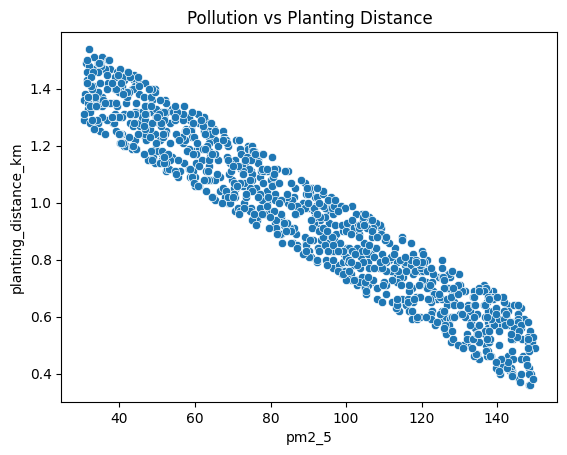

In [ ]:

# Check basic info
df.info()

# Summary statistics
df.describe()

# Check for missing values
print(df.isnull().sum())

# Check class distribution for tree_type
print(df['tree_type'].value_counts())

# Visualize pollution vs distance
sns.scatterplot(x='pm2_5', y='planting_distance_km', data=df)
plt.title("Pollution vs Planting Distance")
plt.show()


In [ ]:
# Encode 'tree_type' as a number for classification
le = LabelEncoder()
df['tree_type_encoded'] = le.fit_transform(df['tree_type'])

# Define input features
features = ['pm2_5', 'tree_cover', 'population_density', 'traffic_density', 'near_road', 'temperature', 'area_in_sqft']

X = df[features]

# Targets
y_distance = df['planting_distance_km']
y_number = df['number_of_trees']
y_tree = df['tree_type_encoded']  # classification

# Split into train-test
X_train, X_test, y_dist_train, y_dist_test = train_test_split(X, y_distance, test_size=0.2, random_state=42)
_, _, y_num_train, y_num_test = train_test_split(X, y_number, test_size=0.2, random_state=42)
_, _, y_tree_train, y_tree_test = train_test_split(X, y_tree, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_dist_train)
pred_lr = lr.predict(X_test_scaled)

# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_dist_train)
pred_dt = dt.predict(X_test_scaled)

# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_dist_train)
pred_rf = rf.predict(X_test_scaled)

# SVR
svr = SVR()
svr.fit(X_train_scaled, y_dist_train)
pred_svr = svr.predict(X_test_scaled)

# Evaluate all
print("R2 Scores for Planting Distance:")
print("LinearRegression:", r2_score(y_dist_test, pred_lr))
print("DecisionTreeRegressor:", r2_score(y_dist_test, pred_dt))
print("RandomForestRegressor:", r2_score(y_dist_test, pred_rf))
print("SVR:", r2_score(y_dist_test, pred_svr))


R2 Scores for Planting Distance:
LinearRegression: 0.9998965935754996
DecisionTreeRegressor: 0.9911289727869472
RandomForestRegressor: 0.9979233196856301
SVR: 0.9516496460741211


In [ ]:
# Use same models again
rf_tree = RandomForestRegressor()
rf_tree.fit(X_train_scaled, y_num_train)
pred_num_rf = rf_tree.predict(X_test_scaled)

print("\nR2 Score for Number of Trees:", r2_score(y_num_test, pred_num_rf))



R2 Score for Number of Trees: 0.9988368095022471


In [ ]:
# Random Forest Classifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_scaled, y_tree_train)
pred_tree_rf = clf_rf.predict(X_test_scaled)

# Decision Tree Classifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_scaled, y_tree_train)
pred_tree_dt = clf_dt.predict(X_test_scaled)

# SVM Classifier
clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_tree_train)
pred_tree_svm = clf_svm.predict(X_test_scaled)

# Accuracy
print("\nClassification Accuracy for Tree Type:")
print("RandomForestClassifier:", accuracy_score(y_tree_test, pred_tree_rf))
print("DecisionTreeClassifier:", accuracy_score(y_tree_test, pred_tree_dt))
print("SVM Classifier:", accuracy_score(y_tree_test, pred_tree_svm))

# Optional detailed report
print("\nClassification Report:\n", classification_report(y_tree_test, pred_tree_rf, target_names=le.classes_))



Classification Accuracy for Tree Type:
RandomForestClassifier: 1.0
DecisionTreeClassifier: 1.0
SVM Classifier: 0.945

Classification Report:
               precision    recall  f1-score   support

      Medium       1.00      1.00      1.00        49
       Short       1.00      1.00      1.00        56
        Tall       1.00      1.00      1.00        95

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
# Example new input
new_data = pd.DataFrame({
    'pm2_5': [110],
    'tree_cover': [35],
    'population_density': [7000],
    'traffic_density': [1500],
    'near_road': [1],
    'temperature': [32],
    'area_in_sqft': [300]
})

# Preprocess
new_data_scaled = scaler.transform(new_data)

# Define RandomForestRegressor and fit it to the data
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_dist_train)

# Predict
pred_dist = rf.predict(new_data_scaled)
pred_num = rf_tree.predict(new_data_scaled)
pred_tree = le.inverse_transform(clf_rf.predict(new_data_scaled))

print("🌿 Predicted Planting Distance (km):", round(pred_dist[0], 2))
print("🌳 Predicted Number of Trees:", int(pred_num[0]))
print("🌲 Suggested Tree Type:", pred_tree[0])

🌿 Predicted Planting Distance (km): 0.79
🌳 Predicted Number of Trees: 13
🌲 Suggested Tree Type: Tall


In [ ]:
import joblib

joblib.dump(rf, 'model_distance.pkl')
joblib.dump(rf_tree, 'model_count.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']